We explore the following models:

Decision Tree

Random Forest

In [ ]:
# Importing the Neccessary Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     RandomizedSearchCV,
                                     GridSearchCV)

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             precision_score,
                             recall_score,
                             RocCurveDisplay,
                             precision_recall_curve,
                             average_precision_score,
                             roc_auc_score,
                             roc_curve, auc)

from sklearn.neighbors import NearestCentroid
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

import time
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading the Dataframe

test_data = pd.read_excel('/content/test_data.xlsx')
train_data = pd.read_excel('/content/train_data.xlsx')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Remove the last column from test data for predictions
test_target = test_data.iloc[:, -1]
test_data = test_data.iloc[:, :-1]

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93     29689
           1       0.97      0.99      0.98     84016

    accuracy                           0.97    113705
   macro avg       0.97      0.95      0.96    113705
weighted avg       0.97      0.97      0.97    113705

Accuracy: 0.9664570599357988


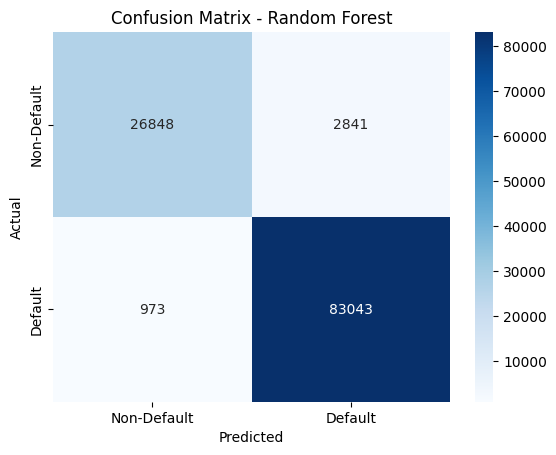

In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Engineering Function
def preprocess_data(data):
    # Categorize income into 3 categories: low, medium, high
    data['Income_Category'] = pd.cut(data['annual_inc'], bins=[0, 50000, 100000, np.inf], labels=['low', 'medium', 'high'])

    # Encode joint account (1 if joint, 0 otherwise, invert for risk)
    data['Joint_Account_Risk'] = data['application_type'].apply(lambda x: 0 if x == 1 else 1)

    # Encode CIBIL score (1 for low risk, 0 for high risk)
    data['CIBIL_Risk'] = data['cibil_score'].apply(lambda x: 0 if x < 700 else 1)

    # Encode rent/mortgage (1 if rent, 0 otherwise)
    data['Rent_Risk'] = data['home_ownership'].apply(lambda x: 1 if x == 'rent' else 0)


    # Encode Income_Category (Categorical variable)
    le = LabelEncoder()
    data['Income_Category'] = le.fit_transform(data['Income_Category'])

    return data
# Preprocess train and test data
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
predictions_dt = dt_model.predict(X_test)
predictions_rf = rf_model.predict(X_test)

# Evaluation for Random Forest
print("Random Forest Evaluation:")
print(classification_report(y_train, rf_model.predict(X_train)))
print(f"Accuracy: {accuracy_score(y_train, rf_model.predict(X_train))}")

# Confusion Matrix for Random Forest
cm = confusion_matrix(y_train, rf_model.predict(X_train))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


The Random Forest model achieves an impressive 96.65% accuracy, indicating strong overall performance. It demonstrates 97% precision for both non-defaulters (class 0) and defaulters (class 1), ensuring high correctness of predictions. The recall for defaulters is 99%, effectively identifying most defaulters, while the recall for non-defaulters is slightly lower at 90%, resulting in some missed non-default predictions. The F1-scores for both classes are high (0.93 for class 0, 0.98 for class 1), highlighting a balanced precision-recall trade-off. The weighted averages show consistent performance across the dataset. Further tuning could optimize recall for non-defaulters, ensuring no low-risk applicants are unnecessarily flagged.